In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bdi2_data = pd.read_csv('../data/data_BDI2.csv')

C:\Users\Khan\AppData\Local\Temp\ipykernel_5824\393699815.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  bdi2_data = pd.read_csv('../data/data_BDI2.csv')


In [3]:
bdi2_data

,StudentID,studentAssessmentID,resultStudentDomainID,Student TEIDS ID,domainID,domainText,ScoreTypeID,ScoreTypeText,StaffExternalID,testDate,...,AESign,isSSRequired,stdDevScore1,stdDevScore2,stdDevScore3,NCESign,totalCSS,totalCSSMin,totalCSSMax,NormType
0,2224693,8625078,138104116,52101,7,Self-Care,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,322.0,301.0,343.0,2
1,2224693,8625078,138104117,52101,10,Adult Interaction,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,413.0,403.0,423.0,2
2,2224693,8625078,138104118,52101,12,Self-Concept and Social Role,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,365.0,355.0,375.0,2
3,2224693,8625078,138104119,52101,14,Receptive Communication,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,343.0,333.0,353.0,2
4,2224693,8625078,138104120,52101,15,Expressive Communication,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,288.0,267.0,309.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325681,2319431,8761874,140602545,NaN,13,Communication,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,<,381.0,373.0,388.0,2
325682,2319431,8761874,140602546,NaN,16,Motor,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,427.0,420.0,433.0,2
325683,2319431,8761874,140602547,NaN,19,Perceptual Motor,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
325684,2319431,8761874,140602548,NaN,20,Cognitive,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,433.0,424.0,441.0,2


In [4]:
# bdi2_data = bdi2_data.set_index('Student TEIDS ID')

In [5]:
pivoted_bdi2 = bdi2_data.pivot_table(
    index='Student TEIDS ID',
    columns='domainText',
    values=['DQScore', 'rawScore', 'ZScore'],  # Adjust to include only numeric columns
)

In [6]:
pivoted_bdi2

DQScore                                                 \
domainText       Adaptive Cognitive Communication  Motor Personal-Social   
Student TEIDS ID                                                           
52101                80.0      97.0          73.0   95.0           115.0   
416571               65.0      66.0          70.0   91.0            67.0   
419105               95.0      77.0          85.0  107.0            75.0   
419833              105.0     104.0         130.0  119.0            90.0   
423227               65.0      59.0          55.0   82.0            60.0   
...                   ...       ...           ...    ...             ...   
571437               90.0      88.0          85.0   95.0            77.0   
580447               60.0      83.0          84.0   78.0            78.0   
580709               70.0      68.0          65.0   81.0            65.0   
650159               93.0      84.0          88.0   98.0            92.0   
xxxxxxx              90.0     100.0          84.0  100.0           103.0   

                   ZScore                                                   \
domainText       Adaptive Adult Interaction Attention and Memory Cognitive   
Student TEIDS ID                                                             
52101               -1.33              1.67                -0.33     -0.20   
416571              -2.33             -1.67                -2.00     -2.27   
419105              -0.33             -0.67                -1.00     -1.53   
419833               0.33             -0.33                 0.67      0.27   
423227              -2.33             -3.00                -2.33     -2.73   
...                   ...               ...                  ...       ...   
571437              -0.67             -2.00                -0.67     -0.80   
580447              -2.67             -0.67                -1.00     -1.13   
580709              -2.00             -2.67                -2.33     -2.13   
650159              -0.47              0.33                -1.00     -1.07   
xxxxxxx             -0.67              1.00                 0.00      0.00   

                                ...         rawScore                          \
domainText       Communication  ... Peer Interaction Perception and Concepts   
Student TEIDS ID                ...                                            
52101                    -1.80  ...              NaN                     5.0   
416571                   -2.00  ...              8.0                    14.0   
419105                   -1.00  ...              6.0                    18.0   
419833                    2.00  ...              8.0                    24.0   
423227                   -3.00  ...              4.0                    12.0   
...                        ...  ...              ...                     ...   
571437                   -1.00  ...              9.0                    14.0   
580447                   -1.07  ...              NaN                     3.0   
580709                   -2.33  ...             14.0                    12.0   
650159                   -0.80  ...              4.0                    13.0   
xxxxxxx                  -1.07  ...              NaN                    12.0   

                                                                           \
domainText       Perceptual Motor Personal Responsibility Personal-Social   
Student TEIDS ID                                                            
52101                         NaN                     NaN            20.0   
416571                       15.0                     1.0            65.0   
419105                       20.0                     7.0            82.0   
419833                       20.0                    10.0            97.0   
423227                       14.0                     0.0            38.0   
...                           ...                     ...             ...   
571437                       16.0             

In [7]:
bdi2_data["Program Label" ] = "Entrance"

In [8]:
bdi2_data.head()

,StudentID,studentAssessmentID,resultStudentDomainID,Student TEIDS ID,domainID,domainText,ScoreTypeID,ScoreTypeText,StaffExternalID,testDate,...,isSSRequired,stdDevScore1,stdDevScore2,stdDevScore3,NCESign,totalCSS,totalCSSMin,totalCSSMax,NormType,Program Label
0,2224693,8625078,138104116,52101,7,Self-Care,2.0,ItemDetails,34775.0,2/25/2022,...,1.0,NaN,NaN,NaN,NaN,322.0,301.0,343.0,2,Entrance
1,2224693,8625078,138104117,52101,10,Adult Interaction,2.0,ItemDetails,34775.0,2/25/2022,...,1.0,NaN,NaN,NaN,NaN,413.0,403.0,423.0,2,Entrance
2,2224693,8625078,138104118,52101,12,Self-Concept and Social Role,2.0,ItemDetails,34775.0,2/25/2022,...,1.0,NaN,NaN,NaN,NaN,365.0,355.0,375.0,2,Entrance
3,2224693,8625078,138104119,52101,14,Receptive Communication,2.0,ItemDetails,34775.0,2/25/2022,...,1.0,NaN,NaN,NaN,NaN,343.0,333.0,353.0,2,Entrance
4,2224693,8625078,138104120,52101,15,Expressive Communication,2.0,ItemDetails,34775.0,2/25/2022,...,1.0,NaN,NaN,NaN,NaN,288.0,267.0,309.0,2,Entrance


In [9]:
bdi2_data = bdi2_data.rename(columns = {'Student TEIDS ID':'Child ID'})

In [10]:
tranpose_data = pd.read_csv('../data/BDI2_edited.csv')

C:\Users\Khan\AppData\Local\Temp\ipykernel_5824\1867131386.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tranpose_data = pd.read_csv('../data/BDI2_edited.csv')


In [11]:
tranpose_data["Program Label" ] = "Entrance"

In [12]:
tranpose_data

,Unnamed: 0,Student TEIDS ID,DQScore_Adaptive,DQScore_Cognitive,DQScore_Communication,DQScore_Motor,DQScore_Personal-Social,ZScore_Adaptive,ZScore_Adult Interaction,ZScore_Attention and Memory,...,rawScore_Perception and Concepts,rawScore_Perceptual Motor,rawScore_Personal Responsibility,rawScore_Personal-Social,rawScore_Reasoning and Academic Skills,rawScore_Receptive Communication,rawScore_Screener Test Total Score,rawScore_Self-Care,rawScore_Self-Concept and Social Role,Program Label
0,0,52101,80.0,97.0,73.0,95.0,115.0,-1.33,1.67,-0.33,...,5.0,NaN,NaN,20.0,NaN,4.0,NaN,2.0,6.0,Entrance
1,1,416571,65.0,66.0,70.0,91.0,67.0,-2.33,-1.67,-2.00,...,14.0,15.0,1.0,65.0,8.0,27.0,NaN,32.0,20.0,Entrance
2,2,419105,95.0,77.0,85.0,107.0,75.0,-0.33,-0.67,-1.00,...,18.0,20.0,7.0,82.0,10.0,32.0,NaN,46.0,32.0,Entrance
3,3,419833,105.0,104.0,130.0,119.0,90.0,0.33,-0.33,0.67,...,24.0,20.0,10.0,97.0,12.0,41.0,NaN,47.0,44.0,Entrance
4,4,423227,65.0,59.0,55.0,82.0,60.0,-2.33,-3.00,-2.33,...,12.0,14.0,0.0,38.0,4.0,22.0,NaN,32.0,14.0,Entrance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,17356,571437,90.0,88.0,85.0,95.0,77.0,-0.67,-2.00,-0.67,...,14.0,16.0,10.0,57.0,10.0,26.0,NaN,26.0,18.0,Entrance
17357,17357,580447,60.0,83.0,84.0,78.0,78.0,-2.67,-0.67,-1.00,...,3.0,NaN,NaN,6.0,NaN,5.0,NaN,0.0,1.0,Entrance
17358,17358,580709,70.0,68.0,65.0,81.0,65.0,-2.00,-2.67,-2.33,...,12.0,12.0,4.0,56.0,12.0,20.0,NaN,31.0,12.0,Entrance
17359,17359,650159,93.0,84.0,88.0,98.0,92.0,-0.47,0.33,-1.00,...,13.0,14.0,8.0,74.0,9.0,26.0,NaN,30.0,27.0,Entrance


In [13]:
columns_to_average = [
    'DQScore_Adaptive',
    'DQScore_Cognitive',
    'DQScore_Communication',
    'DQScore_Motor',
    'DQScore_Personal-Social'
]
# Add a new column with the average of the selected columns
tranpose_data['Total_DQScore'] = tranpose_data[columns_to_average].mean(axis=1)

In [14]:
tranpose_data.columns

Index(['Unnamed: 0', 'Student TEIDS ID', 'DQScore_Adaptive',
       'DQScore_Cognitive', 'DQScore_Communication', 'DQScore_Motor',
       'DQScore_Personal-Social', 'ZScore_Adaptive',
       'ZScore_Adult Interaction', 'ZScore_Attention and Memory',
       'ZScore_Cognitive', 'ZScore_Communication',
       'ZScore_Expressive Communication', 'ZScore_Fine Motor',
       'ZScore_Gross Motor', 'ZScore_Motor', 'ZScore_Peer Interaction',
       'ZScore_Perception and Concepts', 'ZScore_Perceptual Motor',
       'ZScore_Personal Responsibility', 'ZScore_Personal-Social',
       'ZScore_Reasoning and Academic Skills',
       'ZScore_Receptive Communication', 'ZScore_Self-Care',
       'ZScore_Self-Concept and Social Role', 'rawScore_Adaptive',
       'rawScore_Adult Interaction', 'rawScore_Attention and Memory',
       'rawScore_Cognitive', 'rawScore_Communication',
       'rawScore_Expressive Communication', 'rawScore_Fine Motor',
       'rawScore_Gross Motor', 'rawScore_Motor', 'rawScore_Pee

In [15]:
bdi2_columns=tranpose_data.rename(columns={'Student TEIDS ID': 'TEIDS Child ID',
                                     'DQScore_Adaptive': 'Adaptive Developmental Quotient',
                                     'DQScore_Cognitive': 'Cognitive Developmental Quotient',
                                     'DQScore_Communication': 'Communication Developmental Quotient',
                                     'DQScore_Motor': 'Motor Developmental Quotient',
                                     'DQScore_Personal-Social': 'Personal-Social Developmental Quotient',
                                     'ZScore_Adaptive': 'Adaptive Z-Score',
                                     'ZScore_Adult Interaction': 'Adult Interaction Z-Score',
                                     'ZScore_Attention and Memory': 'Attention and Memory Z-Score',
                                     'ZScore_Cognitive': 'Cognitive Z-Score',
                                     'rawScore_Perception and Concepts': 'Perception and Concepts RS',
                                     'rawScore_Perceptual Motor': 'Perceptual Motor RS',
                                     'rawScore_Personal Responsibility': 'Personal Responsibility RS',
                                     'rawScore_Personal-Social': 'Personal-Social RS',
                                     'rawScore_Reasoning and Academic Skills': 'Reasoning and Academic Skills RS',
                                     'rawScore_Receptive Communication': 'Receptive Communication RS',
                                     'rawScore_Screener Test Total Score': 'Screener Test Total Score RS',
                                     'rawScore_Self-Care': 'Self-Care RS',
                                     'rawScore_Self-Concept and Social Role': 'Self-Concept and Social Role RS'})

In [16]:
bdi2_columns.columns

Index(['Unnamed: 0', 'TEIDS Child ID', 'Adaptive Developmental Quotient',
       'Cognitive Developmental Quotient',
       'Communication Developmental Quotient', 'Motor Developmental Quotient',
       'Personal-Social Developmental Quotient', 'Adaptive Z-Score',
       'Adult Interaction Z-Score', 'Attention and Memory Z-Score',
       'Cognitive Z-Score', 'ZScore_Communication',
       'ZScore_Expressive Communication', 'ZScore_Fine Motor',
       'ZScore_Gross Motor', 'ZScore_Motor', 'ZScore_Peer Interaction',
       'ZScore_Perception and Concepts', 'ZScore_Perceptual Motor',
       'ZScore_Personal Responsibility', 'ZScore_Personal-Social',
       'ZScore_Reasoning and Academic Skills',
       'ZScore_Receptive Communication', 'ZScore_Self-Care',
       'ZScore_Self-Concept and Social Role', 'rawScore_Adaptive',
       'rawScore_Adult Interaction', 'rawScore_Attention and Memory',
       'rawScore_Cognitive', 'rawScore_Communication',
       'rawScore_Expressive Communication', '

In [ ]:
bdi3_data = pd.read_excel('../data/data_BDI3.xlsx')

In [18]:
bdi3_data

,Last Name,First Name,Gender,Date of Birth,Location - Root Level (PC),Location - Root Level (AH),Location - Sub Level 1,Location - Sub Level 2,Location - Sub Level 3,Child ID,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Greater Nashville,NaN,NaN,474074,...,13.0,4.0,2,25,1990-01-01 00:00:00,464.0,450 - 479,2.00,30.0,8
1,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Greater Nashville,NaN,NaN,474186,...,24.0,8.0,25,40,68/90,510.0,502 - 517,0.67,43.0,36
2,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Upper Cumberland,NaN,NaN,474641,...,26.0,9.0,37,42,77/90,514.0,507 - 522,0.33,47.0,43
3,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Southwest,NaN,NaN,474848,...,17.0,6.0,9,32,25/90,487.0,476 - 497,1.33,37.0,22
4,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,South Central,NaN,NaN,474967,...,12.0,3.0,1,22,1990-01-01 00:00:00,451.0,429 - 473,2.33,27.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34974,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Memphis Delta,NaN,NaN,NaN,...,10.0,4.0,2,15,1990-02-01 00:00:00,426.0,408 - 444,2.00,30.0,8
34975,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Southeast Tennessee,NaN,NaN,NaN,...,10.0,4.0,2,15,1990-02-01 00:00:00,426.0,408 - 444,2.00,30.0,8
34976,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,East Tennessee,NaN,NaN,NaN,...,11.0,5.0,5,18,1990-02-01 00:00:00,437.0,421 - 453,1.67,33.0,15
34977,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,First Tennessee,NaN,NaN,NaN,...,9.0,8.0,25,12,58/90,411.0,392 - 431,0.67,43.0,36


In [39]:
eco_data = pd.read_excel('../data/NSS_ECO_Data.xlsx',sheet_name='ECO with Exit23-24 ')

In [40]:
eco_data

,DISTRICT,CHILD_ID,Child ID_ Assessement point,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,...,BDI-2\nEntry SOCIAL_SCALE,BDI-2\nEntry KNOWLEDGE_SCALE,BDI-2\nEntry APPROPRIATE_ACTION_SCALE,BDI2 Entrance S/E\nStd Dev (Zscore),BDI2 Entrance\nCommunication Std Dev. (Z Score),BDI2 Entrance\nCognition Std Dev. (Z Score),BDI2 Entrance\nK/S\nStd Dev (Zscore),BDI2 Entrance\nAdaptive Std Dev (Zscore),BDI2 Entrance\nMotor Std Dev (Zscore),BDI2 Entrance\nA/B\nStd Dev (Zscore)
0,GN,473991,NaN,2020-01-07,1.0,1.0,1.0,2022-12-27,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GN,474186,NaN,2020-02-13,1.0,1.0,1.0,2023-10-26,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ET,474575,NaN,2020-01-17,3.0,5.0,4.0,2020-07-29,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NW,474623,NaN,2019-01-22,3.0,1.0,2.0,2022-12-16,4.0,4.0,...,3.0,6.0,2.0,-1.8,-1.27,-1.33,-1.300,-2.67,-1.67,-2.17
4,SW,474848,NaN,2021-07-09,3.0,3.0,6.0,2023-08-04,7.0,7.0,...,3.0,1.0,6.0,-2.0,-3.00,-2.47,-2.735,-1.67,-0.67,-1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,SC,579717,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,SC,579729,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,ET,580243,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,FT,580375,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
child_ids_ecodata = eco_data['CHILD_ID']

In [22]:
child_ids_ecodata.shape

(9999,)

In [23]:
# bdi3_data = bdi3_data.rename(columns={'Adaptive-Self Care Date of Testing':'testdate'})

In [24]:
# combine_bdi2_bdi3 = pd.merge(bdi2_data,bdi3_data, on='Child ID', how="outer")

In [25]:
entrance_exam_data = bdi3_data[bdi3_data["Program Label"] == 'BDI-3 Eligibility Evaluation']

In [26]:
entrance_exam_data.to_csv("entrance_exam_data.csv",index = False)

In [27]:
entrance_exam_data.rename(columns={'Child ID': 'CHILD_ID'}, inplace=True)

C:\Users\Khan\AppData\Local\Temp\ipykernel_5824\809048720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entrance_exam_data.rename(columns={'Child ID': 'CHILD_ID'}, inplace=True)


In [28]:
exit_exam_data = bdi3_data[bdi3_data["Program Label"] != 'BDI-3 Eligibility Evaluation']

In [29]:
exit_exam_data.to_csv("exit_exam_data.csv",index = False)

In [30]:
exit_exam_data.rename(columns={'Child ID': 'CHILD_ID'}, inplace=True)

C:\Users\Khan\AppData\Local\Temp\ipykernel_5824\3550098461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_exam_data.rename(columns={'Child ID': 'CHILD_ID'}, inplace=True)


In [31]:
combine_eco_data = pd.merge(exit_exam_data, eco_data, on='CHILD_ID', how='inner')

In [32]:
combine_eco_data = pd.merge(entrance_exam_data, eco_data, on='CHILD_ID', how='inner')

In [33]:
combine_eco_data.to_csv("combine_eco_data.csv", index = False)

In [34]:
list = list[combine_eco_data.columns]

In [35]:
combine_eco_data = combine_eco_data[(combine_eco_data["<Calc> Months in Program"] >= 6)]

In [36]:
combine_eco_data

,Last Name,First Name,Gender,Date of Birth,Location - Root Level (PC),Location - Root Level (AH),Location - Sub Level 1,Location - Sub Level 2,Location - Sub Level 3,CHILD_ID,...,BDI-2\nEntry SOCIAL_SCALE,BDI-2\nEntry KNOWLEDGE_SCALE,BDI-2\nEntry APPROPRIATE_ACTION_SCALE,BDI2 Entrance S/E\nStd Dev (Zscore),BDI2 Entrance\nCommunication Std Dev. (Z Score),BDI2 Entrance\nCognition Std Dev. (Z Score),BDI2 Entrance\nK/S\nStd Dev (Zscore),BDI2 Entrance\nAdaptive Std Dev (Zscore),BDI2 Entrance\nMotor Std Dev (Zscore),BDI2 Entrance\nA/B\nStd Dev (Zscore)
1,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Memphis Delta,NaN,NaN,486692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Southeast Tennessee,NaN,NaN,489295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Greater Nashville,NaN,NaN,490073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Greater Nashville,NaN,NaN,490134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,First Tennessee,NaN,NaN,490333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,East Tennessee,NaN,NaN,569207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3356,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Memphis Delta,NaN,NaN,569805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3361,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Upper Cumberland,NaN,NaN,569885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3377,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Greater Nashville,NaN,NaN,570233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
combine_eco_data["<Calc> Months in Program"].unique()

array([12,  9,  8, 10, 17, 11,  7, 16, 15, 13, 39, 14, 24,  6, 26, 38, 30,
       29, 34, 31, 33, 23, 28, 18, 21, 25, 19, 20], dtype=int64)

In [178]:
data = {'Progress_Categories': ['e', 'd', 'b', 'c', 'a','Uncategory'],
        'Counts': [2055, 915, 501, 151, 86, 2]}
outcome1_data = pd.DataFrame(data)

In [180]:
outcome1_data

,Progress_Categories,Counts
0,e,2055
1,d,915
2,b,501
3,c,151
4,a,86
5,Uncategory,2


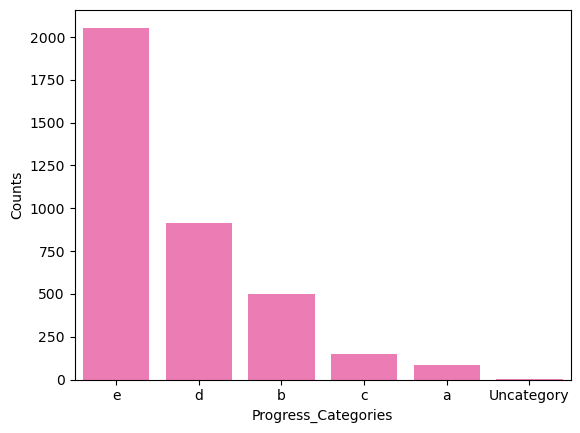

In [192]:
sns.barplot(x='Progress_Categories', y='Counts', data=outcome1_data, color = 'hotpink')
plt.show()

In [160]:
data = {'Progress_Categories': ['d', 'c', 'b', 'e', 'Uncategory', 'a'],
        'Counts': [1769, 810, 667, 311, 65, 58]}
outcome2_df = pd.DataFrame(data)

In [162]:
outcome2_df

,Progress_Categories,Counts
0,d,1769
1,c,810
2,b,667
3,e,311
4,Uncategory,65
5,a,58


In [164]:
# outcome2_df = outcome2_df['Progress_Categories'].value_counts()
# outcome2_df.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
# plt.title('Outcome 2 Progress Categories ')
# plt.show()

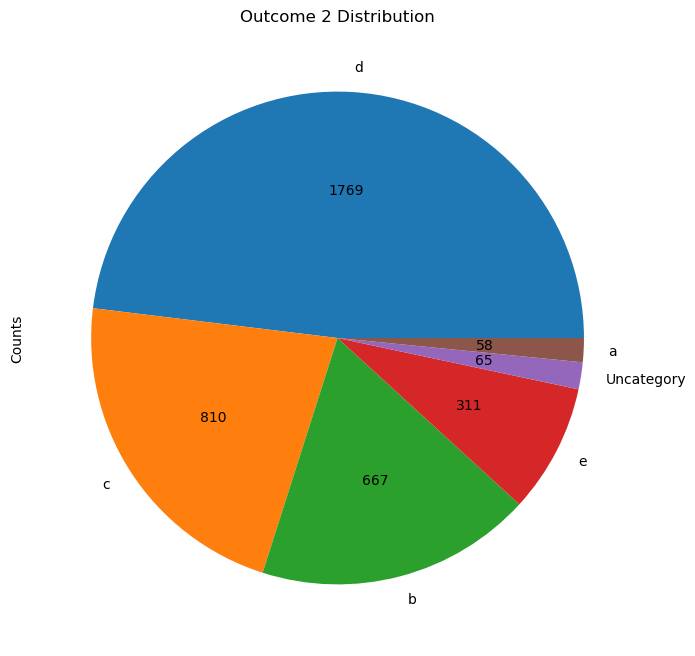

In [166]:
outcome2_df.set_index('Progress_Categories')['Counts'].plot(kind='pie',  autopct=lambda p: '{:.0f}'.format(p * outcome2_df['Counts'].sum() / 100),  figsize=(8,8))
plt.title('Outcome 2 Distribution')
plt.show()

In [194]:
data = {'Progress_Categories': ['d', 'e', 'b', 'c', 'Uncategory', 'a'],
        'Counts': [1424, 1160, 401, 386, 289, 20]}
outcome3_data = pd.DataFrame(data)

In [196]:
outcome3_data

,Progress_Categories,Counts
0,d,1424
1,e,1160
2,b,401
3,c,386
4,Uncategory,289
5,a,20


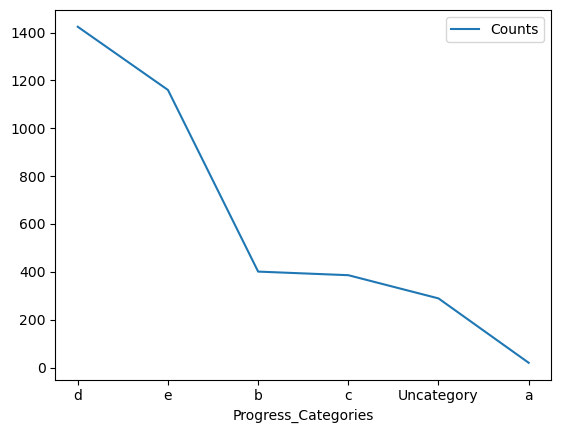

In [198]:
outcome3_data.plot(x='Progress_Categories',
                 y='Counts',
                 kind='line');

In [202]:
data = {'Progress_Categories': ['a', 'b', 'c', 'd', 'e'],
        'Counts': [602, 493, 788, 2794, 1804]}
outcome1_old_rules = pd.DataFrame(data)

In [204]:
outcome2_old_rules

,Progress_Categories,Counts
0,a,1506
1,b,1185
2,c,717
3,d,2336
4,e,737


In [206]:
data = {'Progress_Categories': ['a', 'b', 'c', 'd', 'e'],
        'Counts': [1506, 1185, 717, 2336, 737]}
outcome2_old_rules = pd.DataFrame(data)

In [208]:
outcome2_old_rules

,Progress_Categories,Counts
0,a,1506
1,b,1185
2,c,717
3,d,2336
4,e,737


In [210]:
data = {'Progress_Categories': ['a', 'b', 'c', 'd', 'e'],
        'Counts': [976, 607, 562, 2146, 2190]}
outcome3_old_rules = pd.DataFrame(data)

In [212]:
outcome3_old_rules

,Progress_Categories,Counts
0,a,976
1,b,607
2,c,562
3,d,2146
4,e,2190
